In [1]:
import pandas

In [2]:
imdb = pandas.read_json("imdb.json")


In [3]:
imdb = imdb.drop_duplicates(subset=['title'])

In [4]:
imdb.count()

title                        6575
directors                    6575
box_office_gross             5310
imdb_rating                  6420
plot_description             6043
budget                       2987
gross_us_canada              5255
opening_weekend_us_canada    5009
gross_worldwide              5347
dtype: int64

In [5]:
imdb_year = pandas.read_json("imdb_year.json").drop_duplicates(subset=['title'])

In [6]:
imdb_year.count()

title        6896
imdb_link    6896
year         6896
dtype: int64

In [7]:
rottentomatoes = pandas.read_json("rottentomatoes.json").drop_duplicates(subset=['imdb_title'])

In [8]:
rottentomatoes.count()

imdb_title                6411
imdb_id                   6411
tomatometer_score         6403
audience_score            6403
tomatometer_number        6403
audience_number           6403
genre                     6307
original_language         6254
streaming_release_date    5281
runtime                   6211
cast                      6043
theater_release_date      4231
dtype: int64

In [9]:
imdb = pandas.merge(imdb, rottentomatoes, left_on='title', right_on='imdb_title',validate="one_to_one")

In [10]:
imdb = pandas.merge(imdb, imdb_year, on='title',validate="one_to_one")


In [11]:
imdb.count()

title                        6410
directors                    6410
box_office_gross             5195
imdb_rating                  6268
plot_description             5899
budget                       2886
gross_us_canada              5148
opening_weekend_us_canada    4905
gross_worldwide              5234
imdb_title                   6410
imdb_id                      6410
tomatometer_score            6402
audience_score               6402
tomatometer_number           6402
audience_number              6402
genre                        6306
original_language            6253
streaming_release_date       5280
runtime                      6210
cast                         6042
theater_release_date         4230
imdb_link                    6410
year                         6410
dtype: int64

In [12]:
imdb.head(5)

,title,directors,box_office_gross,imdb_rating,plot_description,budget,gross_us_canada,opening_weekend_us_canada,gross_worldwide,imdb_title,...,tomatometer_number,audience_number,genre,original_language,streaming_release_date,runtime,cast,theater_release_date,imdb_link,year
0,Life of Pi,"{'imdb_link': '/name/nm0000487/', 'name': 'Ang...","124,987,023",7.9,A young man who survives a disaster at sea is ...,"$120,000,000 (estimated)","$124,987,023","$22,451,514","$609,016,565",Life of Pi,...,256 Reviews,"100,000+ Ratings",...,English,"Mar 12, 2013",2h 5m ...,"[{'link': ' /celebrity/suraj_sharma ', 'name':...","Nov 21, 2012",https://www.imdb.com/title/tt0454876/,(2012)
1,The Fault in Our Stars,"{'imdb_link': '/name/nm1837748/', 'name': 'Jos...","124,872,350",7.7,Two teenage cancer patients begin a life-affir...,"$12,000,000 (estimated)","$124,872,350","$48,002,523","$307,166,834",The Fault in Our Stars,...,227 Reviews,"100,000+ Ratings",...,English,"Sep 16, 2014",2h 6m ...,"[{'link': ' /celebrity/shailene_woodley ', 'na...","Jun 6, 2014",https://www.imdb.com/title/tt2582846/,(2014)
2,Sully,"{'imdb_link': '/name/nm0000142/', 'name': 'Cli...","125,070,033",7.4,"When pilot Chesley ""Sully"" Sullenberger lands ...","$60,000,000 (estimated)","$125,070,033","$35,028,301","$240,797,623",Sully,...,349 Reviews,"25,000+ Ratings",...,English,"Dec 20, 2016",1h 36m ...,"[{'link': ' /celebrity/tom_hanks ', 'name': ' ...","Sep 9, 2016",https://www.imdb.com/title/tt3263904/,(2016)
3,Lone Survivor,"{'imdb_link': '/name/nm0000916/', 'name': 'Pet...","125,095,601",7.5,Marcus Luttrell and his team set out on a miss...,"$40,000,000 (estimated)","$125,095,601","$90,872","$154,802,912",Lone Survivor,...,228 Reviews,"100,000+ Ratings",...,English,"Jun 3, 2014",2h 1m ...,"[{'link': ' /celebrity/mark_wahlberg ', 'name'...","Jan 10, 2014",https://www.imdb.com/title/tt1091191/,(2013)
4,Rango,"{'imdb_link': '/name/nm0893659/', 'name': 'Gor...","123,477,607",7.2,Rango is an ordinary chameleon who accidentall...,"$135,000,000 (estimated)","$123,477,607","$38,079,323","$245,724,603",Rango,...,226 Reviews,"100,000+ Ratings",...,English,"Jul 15, 2011",1h 45m ...,"[{'link': ' /celebrity/johnny_depp ', 'name': ...","Mar 4, 2011",https://www.imdb.com/title/tt1192628/,(2011)


In [13]:
imdb.dtypes

title                         object
directors                     object
box_office_gross              object
imdb_rating                  float64
plot_description              object
budget                        object
gross_us_canada               object
opening_weekend_us_canada     object
gross_worldwide               object
imdb_title                    object
imdb_id                        int64
tomatometer_score             object
audience_score                object
tomatometer_number            object
audience_number               object
genre                         object
original_language             object
streaming_release_date        object
runtime                       object
cast                          object
theater_release_date          object
imdb_link                     object
year                          object
dtype: object

In [14]:
import numpy
grossdb = imdb.loc[~(imdb['gross_worldwide'].isna() & imdb['box_office_gross'].isna())]

In [15]:
not_gross = grossdb.loc[grossdb['box_office_gross'].isna()]

In [16]:
not_gross.count()

title                        276
directors                    276
box_office_gross               0
imdb_rating                  271
plot_description             267
budget                       153
gross_us_canada              174
opening_weekend_us_canada    172
gross_worldwide              276
imdb_title                   276
imdb_id                      276
tomatometer_score            276
audience_score               276
tomatometer_number           276
audience_number              276
genre                        276
original_language            276
streaming_release_date       198
runtime                      273
cast                         252
theater_release_date         223
imdb_link                    276
year                         276
dtype: int64

In [17]:
a = 0
import numpy as np
for index in not_gross.index:
    grossdb["box_office_gross"][index] = grossdb["gross_worldwide"][index]

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2549445339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["box_office_gross"][index] = grossdb["gross_worldwide"][index]


In [18]:
not_gross = grossdb.loc[grossdb['box_office_gross'].isna()]
not_gross.count()

title                        0
directors                    0
box_office_gross             0
imdb_rating                  0
plot_description             0
budget                       0
gross_us_canada              0
opening_weekend_us_canada    0
gross_worldwide              0
imdb_title                   0
imdb_id                      0
tomatometer_score            0
audience_score               0
tomatometer_number           0
audience_number              0
genre                        0
original_language            0
streaming_release_date       0
runtime                      0
cast                         0
theater_release_date         0
imdb_link                    0
year                         0
dtype: int64

In [19]:
import seaborn as sns
for index,row in grossdb.iterrows():
    # and not row["box_office_gross"][0].isnumeric()
    grossdb["box_office_gross"][index] = int(row["box_office_gross"].replace(",","").replace("$",""))

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2963776068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["box_office_gross"][index] = int(row["box_office_gross"].replace(",","").replace("$",""))


In [20]:
grossdb["box_office_gross"] = pandas.to_numeric(grossdb["box_office_gross"])

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2891713978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["box_office_gross"] = pandas.to_numeric(grossdb["box_office_gross"])


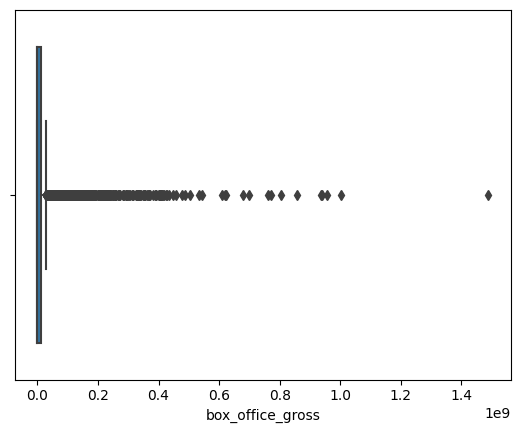

In [21]:
box_office_gross  =  sns.boxplot(x = grossdb['box_office_gross'])
fig = box_office_gross.get_figure()
fig.savefig("box_office_gross.png") 

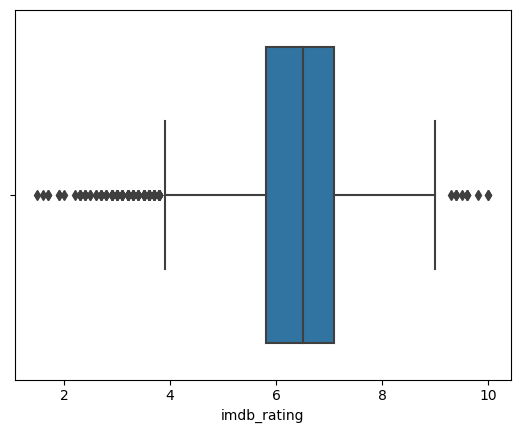

In [22]:
imdb_rating_plot  =  sns.boxplot(x = grossdb['imdb_rating'])
fig = imdb_rating_plot.get_figure()
fig.savefig("imdb_rating.png") 

In [26]:
budget = grossdb[~(grossdb["budget"].isna())]

In [24]:
a = set()
h = {"€":1.07,"₹":0.012,"£":1.21,'¥':0.0076}
for i in budget.index:
    if "$" not in str(grossdb["budget"][i]) and not str(grossdb["budget"][i])[0].isdigit():
        print(grossdb["budget"][i])
        if str(grossdb["budget"][i])[0] in h.keys():
            grossdb["budget"][i] = int(int(grossdb["budget"][i].replace(",","").replace(str(grossdb["budget"][i])[0],"").replace(" (estimated)",""))*h[str(grossdb["budget"][i])[0]])
        else:
            grossdb["budget"][i] = np.NaN


₹500,000,000 (estimated)
£150,000,000 (estimated)
₹600,000,000 (estimated)
₹2,500,000,000 (estimated)
₹450,000,000 (estimated)
€9,200,000 (estimated)
₹550,000,000 (estimated)
€10,002,914 (estimated)
€105,000,000 (estimated)
€10,000,000 (estimated)
€4,000,000 (estimated)
£8,200,000 (estimated)
₹1,800,000,000 (estimated)
₹1,900,000,000 (estimated)
€4,300,000 (estimated)
₹1,250,000,000 (estimated)
€4,993,020 (estimated)
₹1,250,000,000 (estimated)
€5,000,000 (estimated)
¥370,000,000 (estimated)
₹1,390,000,000 (estimated)
₹5,700,000,000 (estimated)
€15,000,000 (estimated)
€10,000,000 (estimated)
€30,690,000 (estimated)
€4,000,000 (estimated)
£12,000,000 (estimated)
₹700,000,000 (estimated)
€9,500,000 (estimated)
€24,926,736 (estimated)
€17,000,000 (estimated)
SEK 165,000,000 (estimated)
£6,400,000 (estimated)
€4,000,000 (estimated)
£20,000,000 (estimated)
¥5,000,000,000 (estimated)
₹700,000,000 (estimated)
₹102,000,000 (estimated)
₩15,000,000,000 (estimated)
€9,000,000 (estimated)
₹500,000,

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2523741289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["budget"][i] = int(int(grossdb["budget"][i].replace(",","").replace(str(grossdb["budget"][i])[0],"").replace(" (estimated)",""))*h[str(grossdb["budget"][i])[0]])
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2523741289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["budget"][i] = np.NaN


In [27]:
import re
for i in budget.index:
    grossdb["budget"][i] = int(re.sub(r'[^0-9]', '', str(grossdb["budget"][i])))

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\939141614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["budget"][i] = int(re.sub(r'[^0-9]', '', str(grossdb["budget"][i])))


In [28]:
budget = grossdb[~(grossdb["budget"].isna())]

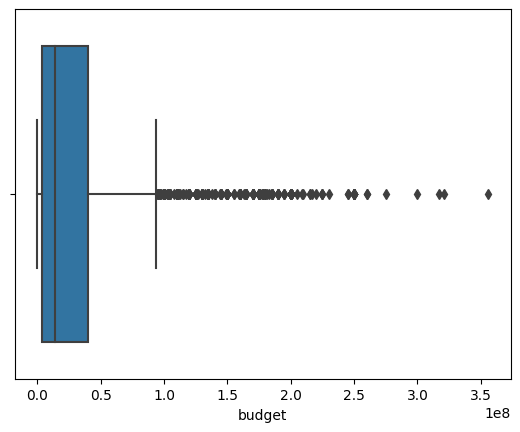

In [29]:
imdb_rating_plot  =  sns.boxplot(x = grossdb['budget'])
fig = imdb_rating_plot.get_figure()
fig.savefig("budget.png") 

In [30]:
grossdb[grossdb.budget == grossdb.budget.max()]

,title,directors,box_office_gross,imdb_rating,plot_description,budget,gross_us_canada,opening_weekend_us_canada,gross_worldwide,imdb_title,...,tomatometer_number,audience_number,genre,original_language,streaming_release_date,runtime,cast,theater_release_date,imdb_link,year
753,Avengers: Endgame,"{'imdb_link': '/name/nm0751577/', 'name': 'Ant...",858373000,8.4,After the devastating events of Avengers: Infi...,356000000,"$858,373,000","$357,115,007","$2,799,439,100",Avengers: Endgame,...,555 Reviews,"50,000+ Ratings",...,English,,3h 1m ...,"[{'link': ' /celebrity/robert_downey_jr ', 'na...","Apr 26, 2019",https://www.imdb.com/title/tt4154796/,(2019)


In [31]:
grossdb.dtypes 

title                         object
directors                     object
box_office_gross               int64
imdb_rating                  float64
plot_description              object
budget                        object
gross_us_canada               object
opening_weekend_us_canada     object
gross_worldwide               object
imdb_title                    object
imdb_id                        int64
tomatometer_score             object
audience_score                object
tomatometer_number            object
audience_number               object
genre                         object
original_language             object
streaming_release_date        object
runtime                       object
cast                          object
theater_release_date          object
imdb_link                     object
year                          object
dtype: object

In [32]:
grossdb["tomatometer_score"]= pandas.to_numeric(grossdb["tomatometer_score"])

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\3505058576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["tomatometer_score"]= pandas.to_numeric(grossdb["tomatometer_score"])


In [33]:
grossdb["audience_score"]= pandas.to_numeric(grossdb["audience_score"])

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\349319597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["audience_score"]= pandas.to_numeric(grossdb["audience_score"])


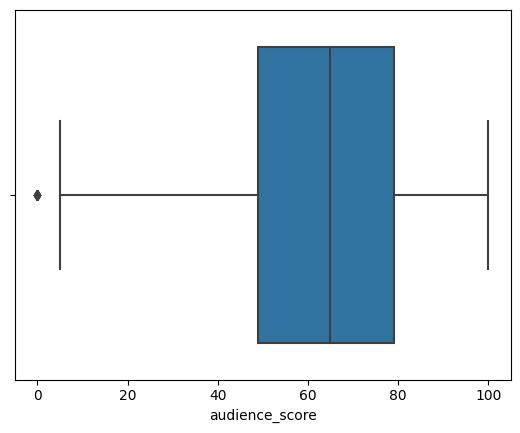

In [34]:
imdb_rating_plot  =  sns.boxplot(x = grossdb['audience_score'])
fig = imdb_rating_plot.get_figure()
fig.savefig("audience_score.png") 

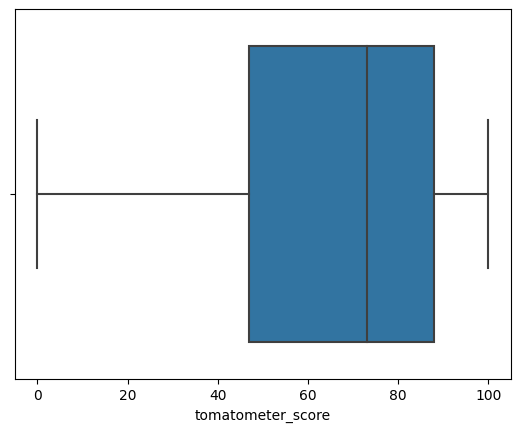

In [35]:
imdb_rating_plot  =  sns.boxplot(x = grossdb['tomatometer_score'])
fig = imdb_rating_plot.get_figure()
fig.savefig("tomatometer_score.png") 

In [36]:
for i in grossdb.index:
    grossdb["year"][i] = int(re.sub(r'[^0-9]', '', str(grossdb["year"][i]))[:4])

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2581307570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["year"][i] = int(re.sub(r'[^0-9]', '', str(grossdb["year"][i]))[:4])


In [37]:
grossdb = grossdb[grossdb["year"]>=2010]

In [38]:
df = grossdb.groupby('year').size().reset_index(name='counts')


In [39]:
df

,year,counts
0,2010,453
1,2011,518
2,2012,523
3,2013,568
4,2014,511
5,2015,538
6,2016,576
7,2017,559
8,2018,593
9,2019,280


In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df['year'], df['counts'], width=.3)
for i, val in enumerate(df['year'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df['year'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá bất động sản trung bình theo số lượng year", fontsize=22)
plt.ylabel('counts')
plt.show()

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\496368032.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['year'], rotation=60, horizontalalignment= 'right')


ValueError: Image size of 74444x1285 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [47]:
grossdb.to_json("data_afterprocessing.json",orient="records")

In [42]:
df2 = grossdb[~grossdb["theater_release_date"].isna()]

In [44]:
grossdb["theater_release_month"] = grossdb["theater_release_date"]
for i in df2.index:
    grossdb["theater_release_month"][i] = grossdb["theater_release_month"][i][:3]

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\2780225758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["theater_release_month"][i] = grossdb["theater_release_month"][i][:3]


In [45]:
df = grossdb.groupby('theater_release_month').size().reset_index(name='counts')


In [46]:
df

,theater_release_month,counts
0,Apr,385
1,Aug,360
2,Dec,271
3,Feb,279
4,Jan,271
5,Jul,299
6,Jun,349
7,Mar,365
8,May,334
9,Nov,329


In [48]:
import pandas

In [60]:
best_actor = pandas.read_csv("BestActor.csv",header=0)

In [61]:
best_actor

,Unnamed: 0,actor,role,film
0,0,Emil Jannings [A],Grand Duke Sergius Alexander,The Last Command
1,1,Emil Jannings [A],August Schilling,The Way of All Flesh
2,2,Warner Baxter,The Cisco Kid,In Old Arizona
3,3,George Arliss [B],Benjamin Disraeli,Disraeli
4,4,Lionel Barrymore,Stephen Ashe,A Free Soul
...,...,...,...,...
91,91,Gary Oldman,Winston Churchill,Darkest Hour
92,92,Rami Malek,Freddie Mercury,Bohemian Rhapsody
93,93,Joaquin Phoenix,Arthur Fleck / Joker,Joker
94,94,Anthony Hopkins,Anthony,The Father


In [63]:
best_actor.count()

Unnamed: 0    96
actor         96
role          96
film          96
dtype: int64

In [64]:
best_actress = pandas.read_csv("BestActress.csv",header=0)

In [67]:
best_actress.count()

Unnamed: 0    97
actress       97
role          97
film          97
dtype: int64

In [ ]:
best_director = pandas.read_csv("BestDirector.csv",header=0)

In [68]:
best_director.count()

Unnamed: 0    95
director      95
film          95
dtype: int64

In [56]:
best_picture = pandas.read_csv("BestPictures.csv",header=0)

In [69]:
best_picture.count()

Unnamed: 0    94
year          94
film          94
producer      94
dtype: int64

In [70]:
running_time = grossdb[~grossdb["runtime"].isna()]

In [71]:
for i in running_time.index:
    grossdb["runtime"][i] = grossdb["runtime"][i].replace(" ","")
    if "h" in grossdb["runtime"][i]:
        grossdb["runtime"][i] = int(grossdb["runtime"][i].split("h")[0])*60 + int(grossdb["runtime"][i].split("h")[1][:-1])
    else:
        grossdb["runtime"][i] = int(grossdb["runtime"][i][:-1])

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\1628062755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["runtime"][i] = grossdb["runtime"][i].replace(" ","")
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\1628062755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossdb["runtime"][i] = int(grossdb["runtime"][i].split("h")[0])*60 + int(grossdb["runtime"][i].split("h")[1][:-1])
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_6360\1628062755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [76]:
genre = grossdb[~grossdb["genre"].isna()]

In [ ]:
list_genre = []
for i in genre.index:
    grossdb["genre"][i] = grossdb["genre"][i].replace(" ","").split(",")
    list_genre = list_genre + grossdb["genre"][i]
print(list_genre)

In [81]:
list_genre = set(list_genre)

In [82]:
list_genre

{'Action',
 'Adventure',
 'Animation',
 'Anime',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Entertainment',
 'Fantasy',
 'Foreign',
 'History',
 'Holiday',
 'Horror',
 'Kids&family',
 'Lgbtq+',
 'Music',
 'Musical',
 'Mystery&thriller',
 'Romance',
 'Sci-fi',
 'Sports',
 'Sports&fitness',
 'Stand-up',
 'War',
 'Western'}

In [83]:
grossdb.to_json("data_afterprocessing.json",orient="records")

In [2]:
import pandas
imdb = pandas.read_json("data_afterprocessing.json")


In [4]:
imdb.head(5)

,title,directors,box_office_gross,imdb_rating,plot_description,budget,gross_us_canada,opening_weekend_us_canada,gross_worldwide,imdb_title,...,audience_number,genre,original_language,streaming_release_date,runtime,cast,theater_release_date,imdb_link,year,theater_release_month
0,Life of Pi,"{'imdb_link': '/name/nm0000487/', 'name': 'Ang...",124987023,7.9,A young man who survives a disaster at sea is ...,120000000.0,"$124,987,023","$22,451,514","$609,016,565",Life of Pi,...,"100,000+ Ratings","[Adventure, Drama]",English,"Mar 12, 2013",125.0,"[{'link': ' /celebrity/suraj_sharma ', 'name':...","Nov 21, 2012",https://www.imdb.com/title/tt0454876/,2012,Nov
1,The Fault in Our Stars,"{'imdb_link': '/name/nm1837748/', 'name': 'Jos...",124872350,7.7,Two teenage cancer patients begin a life-affir...,12000000.0,"$124,872,350","$48,002,523","$307,166,834",The Fault in Our Stars,...,"100,000+ Ratings","[Romance, Drama]",English,"Sep 16, 2014",126.0,"[{'link': ' /celebrity/shailene_woodley ', 'na...","Jun 6, 2014",https://www.imdb.com/title/tt2582846/,2014,Jun
2,Sully,"{'imdb_link': '/name/nm0000142/', 'name': 'Cli...",125070033,7.4,"When pilot Chesley ""Sully"" Sullenberger lands ...",60000000.0,"$125,070,033","$35,028,301","$240,797,623",Sully,...,"25,000+ Ratings","[Drama, Biography]",English,"Dec 20, 2016",96.0,"[{'link': ' /celebrity/tom_hanks ', 'name': ' ...","Sep 9, 2016",https://www.imdb.com/title/tt3263904/,2016,Sep
3,Lone Survivor,"{'imdb_link': '/name/nm0000916/', 'name': 'Pet...",125095601,7.5,Marcus Luttrell and his team set out on a miss...,40000000.0,"$125,095,601","$90,872","$154,802,912",Lone Survivor,...,"100,000+ Ratings","[War, Drama]",English,"Jun 3, 2014",121.0,"[{'link': ' /celebrity/mark_wahlberg ', 'name'...","Jan 10, 2014",https://www.imdb.com/title/tt1091191/,2013,Jan
4,Rango,"{'imdb_link': '/name/nm0893659/', 'name': 'Gor...",123477607,7.2,Rango is an ordinary chameleon who accidentall...,135000000.0,"$123,477,607","$38,079,323","$245,724,603",Rango,...,"100,000+ Ratings","[Kids&family, Comedy, Adventure, Animation]",English,"Jul 15, 2011",105.0,"[{'link': ' /celebrity/johnny_depp ', 'name': ...","Mar 4, 2011",https://www.imdb.com/title/tt1192628/,2011,Mar


In [12]:
original_language = []
original_languages = imdb[~imdb["original_language"].isna()]
for i in original_languages.index:
    imdb["original_language"][i] = imdb["original_language"][i].replace(" ","").split("(")[0]
    original_language = original_language + [imdb["original_language"][i]]
original_language = set(original_language)
print(original_language)

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_2280\521324463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["original_language"][i] = imdb["original_language"][i].replace(" ","").split("(")[0]


{'Slovak', 'Turkish', 'Indonesian', 'Armenian', 'Spanish', 'Persian', 'Bosnian', 'Thai', 'Unknownlanguage', 'Tamil', 'Hmong', 'Azerbaijani', 'Danish', 'Polish', 'Albanian', 'Norwegian', 'crp', 'Hindi', 'German', 'Hebrew', 'Tagalog', 'French', 'Georgian', 'Amharic', 'Icelandic', 'Marathi', 'Bangla', 'Italian', 'Greek', 'Finnish', 'Latin', 'Serbian', 'Telugu', 'Filipino', 'Czech', 'English', 'Urdu', 'Malay', 'Catalan', 'Maori', 'Chinese', 'Lithuanian', 'Korean', 'Swedish', 'Estonian', 'Vietnamese', 'Bulgarian', 'Romanian', 'Japanese', 'Dutch', 'Arabic', 'Portuguese', 'Punjabi', 'Yiddish', 'Russian', 'Malayalam', 'Hungarian', 'Kannada', 'ScottishGaelic', 'Tibetan'}


In [16]:
df = imdb.groupby('original_language').size().reset_index(name='counts')


In [17]:
df.count()

original_language    60
counts               60
dtype: int64

In [19]:
df.sort_values(by="counts")

,original_language,counts
59,crp,1
1,Amharic,1
46,Slovak,1
4,Azerbaijani,1
36,Marathi,1
35,Maori,1
33,Malay,1
32,Lithuanian,1
31,Latin,1
58,Yiddish,1


In [23]:
df = imdb.groupby('original_language')['box_office_gross'].mean().reset_index(name='box_office_gross').sort_values(by="box_office_gross")

In [24]:
df

,original_language,box_office_gross
36,Marathi,1.000000e+03
32,Lithuanian,3.275000e+03
35,Maori,4.426000e+03
59,crp,5.088000e+03
45,Serbian,1.970800e+04
7,Bulgarian,2.808000e+04
53,Tibetan,2.963100e+04
3,Armenian,3.680100e+04
1,Amharic,3.844900e+04
25,Icelandic,3.935767e+04


In [25]:
imdb.count()


title                        5470
directors                    5470
box_office_gross             5470
imdb_rating                  5465
plot_description             5105
budget                       2698
gross_us_canada              5128
opening_weekend_us_canada    4893
gross_worldwide              5234
imdb_title                   5470
imdb_id                      5470
tomatometer_score            4189
audience_score               4545
tomatometer_number           5468
audience_number              5468
genre                        5410
original_language            5370
streaming_release_date       4729
runtime                      5340
cast                         5186
theater_release_date         4020
imdb_link                    5470
year                         5470
theater_release_month        4020
dtype: int64

In [81]:
imdb_directors = imdb[~imdb["directors"].isna()]

In [101]:
imdb_cast = imdb[~imdb["cast"].isna()]

In [38]:
imdb.insert(1, 'number_best_director', 0)
imdb.insert(1, 'number_best_actor', 0)
imdb.insert(1, 'number_best_actress', 0)
imdb.insert(1, 'number_nominated_best_director', 0)
imdb.insert(1, 'number_nominated_best_actor', 0)
imdb.insert(1, 'number_nominated_best_actress', 0)

In [103]:
for i in imdb_cast.index:
    for j  in range(len(imdb["cast"][i])):
        imdb["cast"][i][j]["name"] =imdb["cast"][i][j]["name"].strip()

In [90]:
ominated_best_director = pandas.read_csv("BestDirector.csv",header=0)

In [136]:
print("ominated bestdirector")
print(ominated_best_director.head(2))
print("--------------------")
print("ominated best actor")
print(ominated_best_actor.head(2))
print("--------------------")
print("ominated best actress")
print(ominated_best_actress.head(2))
print("--------------------")

ominated bestdirector
   Unnamed: 0                           director             film  year  \
0           0   Frank Borzage (Dramatic Picture)       7th Heaven  1927   
1           1  Herbert Brenon (Dramatic Picture)  Sorrell and Son  1927   

   winner  
0       1  
1       0  
--------------------
ominated best actor
   Unnamed: 0                actor                          role  \
0           0    Emil Jannings [A]  Grand Duke Sergius Alexander   
1           1  Richard Barthelmess                 Nickie Elkins   

               film  year  winner  
0  The Last Command  1927       1  
1         The Noose  1927       0  
--------------------
ominated best actress
   Unnamed: 0           actor          role             film  year  winner
0           0   Janet Gaynor          Diane       7th Heaven  1927       1
1           1  Louise Dresser  Mrs. Pleznik  A Ship Comes In  1927       0
--------------------


In [57]:
ominated_best_actress = pandas.read_csv("BestActress.csv",header=0)

In [58]:
ominated_best_actor = pandas.read_csv("BestActor.csv",header=0)

In [91]:
best_director = ominated_best_director[ominated_best_director["winner"]==1]

In [60]:
best_actress = ominated_best_actress[ominated_best_actress["winner"]==1]

In [61]:
best_actor = ominated_best_actor[ominated_best_actor["winner"]==1]

In [92]:
best_director.dtypes

Unnamed: 0     int64
director      object
film          object
year           int64
winner         int64
dtype: object

In [95]:
imdb.dtypes

title                              object
number_nominated_best_actress       int64
number_nominated_best_actor         int64
number_nominated_best_director      int64
number_best_actress                 int64
number_best_actor                   int64
number_best_director                int64
number                              int64
directors                          object
box_office_gross                    int64
imdb_rating                       float64
plot_description                   object
budget                            float64
gross_us_canada                    object
opening_weekend_us_canada          object
gross_worldwide                    object
imdb_title                         object
imdb_id                             int64
tomatometer_score                 float64
audience_score                    float64
tomatometer_number                 object
audience_number                    object
genre                              object
original_language                 

In [ ]:
for i in imdb_cast.index:
    best_actor_h = list(best_actor[best_actor["year"]<imdb["year"][i]]["actor"])

    m = 0
    for kkk in best_actor_h:
        for j in range(len(imdb["cast"][i])):
            if imdb["cast"][i][j]["name"] == kkk.strip():
                m = m+1
    imdb["number_best_actor"][i] = m 

In [123]:
for i in imdb_cast.index:
    best_actor_h = list(ominated_best_actor[(ominated_best_actor["year"]<imdb["year"][i]) & (ominated_best_actor["year"]>1970)]["actor"])
    m = 0
    for kkk in best_actor_h:
        for j in range(len(imdb["cast"][i])):
            if imdb["cast"][i][j]["name"] == kkk.strip():
                m = m+1
    imdb["number_nominated_best_actor"][i] = m 

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_2280\3801516779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["number_nominated_best_actor"][i] = m


In [ ]:
for i in imdb_directors.index:
    best_director_h = list(best_director[best_director["year"]<imdb["year"][i]]["director"])
    m = 0
    for kkk in best_director_h:
        if imdb["directors"][i]["name"] == kkk:
            m = m+1
    imdb["number_best_director"][i] = m 

In [124]:
for i in imdb_directors.index:
    best_director_h = list(ominated_best_director[ominated_best_director["year"]<imdb["year"][i]]["director"])
    m = 0
    for kkk in best_director_h:
        if imdb["directors"][i]["name"] == kkk:
            m = m+1
    imdb["number_nominated_best_director"][i] = m 

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_2280\3167925981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["number_nominated_best_director"][i] = m


In [ ]:
for i in imdb_cast.index:
    best_actor_h = list(best_actress[best_actress["year"]<imdb["year"][i]]["actor"])
    m = 0
    for kkk in best_actor_h:
        for j in range(len(imdb["cast"][i])):
            if imdb["cast"][i][j]["name"] == kkk.strip():
                print(imdb["cast"][i][j]["name"])
                m = m+1
    imdb["number_best_actress"][i] = m 

In [125]:
for i in imdb_cast.index:
    best_actor_h = list(ominated_best_actress[(ominated_best_actress["year"]<imdb["year"][i])&(ominated_best_actress["year"]>1970)]["actor"])
    m = 0
    for kkk in best_actor_h:
        for j in range(len(imdb["cast"][i])):
            if imdb["cast"][i][j]["name"] == kkk.strip():
                m = m+1
    imdb["number_nominated_best_actress"][i] = m 

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_2280\4227920473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["number_nominated_best_actress"][i] = m


Laura Dern
Laura Linney
Laura Linney
Emma Stone
Jane Fonda
Diane Keaton
Jane Fonda
Jane Fonda
Jane Fonda
Diane Keaton
Jane Fonda
Diane Keaton
Diane Keaton
Samantha Morton
Keira Knightley
Helen Mirren
Helen Mirren
Anjelica Huston
Rooney Mara
Julianne Moore
Julianne Moore
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Emma Thompson
Winona Ryder
Anne Hathaway
Julia Roberts
Julia Roberts
Emily Watson
Emily Watson
Susan Sarandon
Susan Sarandon
Susan Sarandon
Susan Sarandon
Susan Sarandon
Barbra Streisand
Barbra Streisand
Angela Bassett
Judi Dench
Judi Dench
Naomi Watts
Judi Dench
Judi Dench
Julie Christie
Julie Christie
Julie Christie
Maggie Smith
Judi Dench
Judi Dench
Judi Dench
Judi Dench
Laura Linney
Imelda Staunton
Laura Linney
Jennifer Lawrence
Jennifer Lawrence
Jennifer Lawrence
Charlotte Rampling
Salma Hayek
Michelle Williams
Michelle Williams
Judi Dench
Judi Dench
Judi Dench
Judi Dench
Charlize Theron
Charlize Theron
R

In [126]:
imdb_h = imdb[imdb["number_nominated_best_actor"] == imdb["number_nominated_best_actor"].max()]

In [127]:
imdb_h

,title,number_nominated_best_actress,number_nominated_best_actor,number_nominated_best_director,number_best_actress,number_best_actor,number_best_director,number,directors,box_office_gross,...,audience_number,genre,original_language,streaming_release_date,runtime,cast,theater_release_date,imdb_link,year,theater_release_month
38,Larry Crowne,2,20,0,1,8,0,0,"{'imdb_link': '/name/nm0000158/', 'name': 'Tom...",35608245,...,"25,000+ Ratings","[Romance, Comedy]",English,"Nov 15, 2011",98.0,"[{'link': ' /celebrity/tom_hanks ', 'name': 'T...","Jul 1, 2011",https://www.imdb.com/title/tt1583420/,2011,Jul


In [129]:
imdb.to_json("data_afterprocessing_with_award.json",orient="records")